In [1]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
import matplotlib  as mpl
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
font = {'family' : 'Nimbus Roman',
            'weight' : 'bold',
            'size'   : 40}
mpl.rc('font', **font)
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import contextily as ctx


ConnectTimeout: HTTPSConnectionPool(host='a.basemaps.cartocdn.com', port=443): Max retries exceeded with url: /light_all/3/0/0.png (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x2b5ea3a4f9a0>, 'Connection to a.basemaps.cartocdn.com timed out. (connect timeout=None)'))

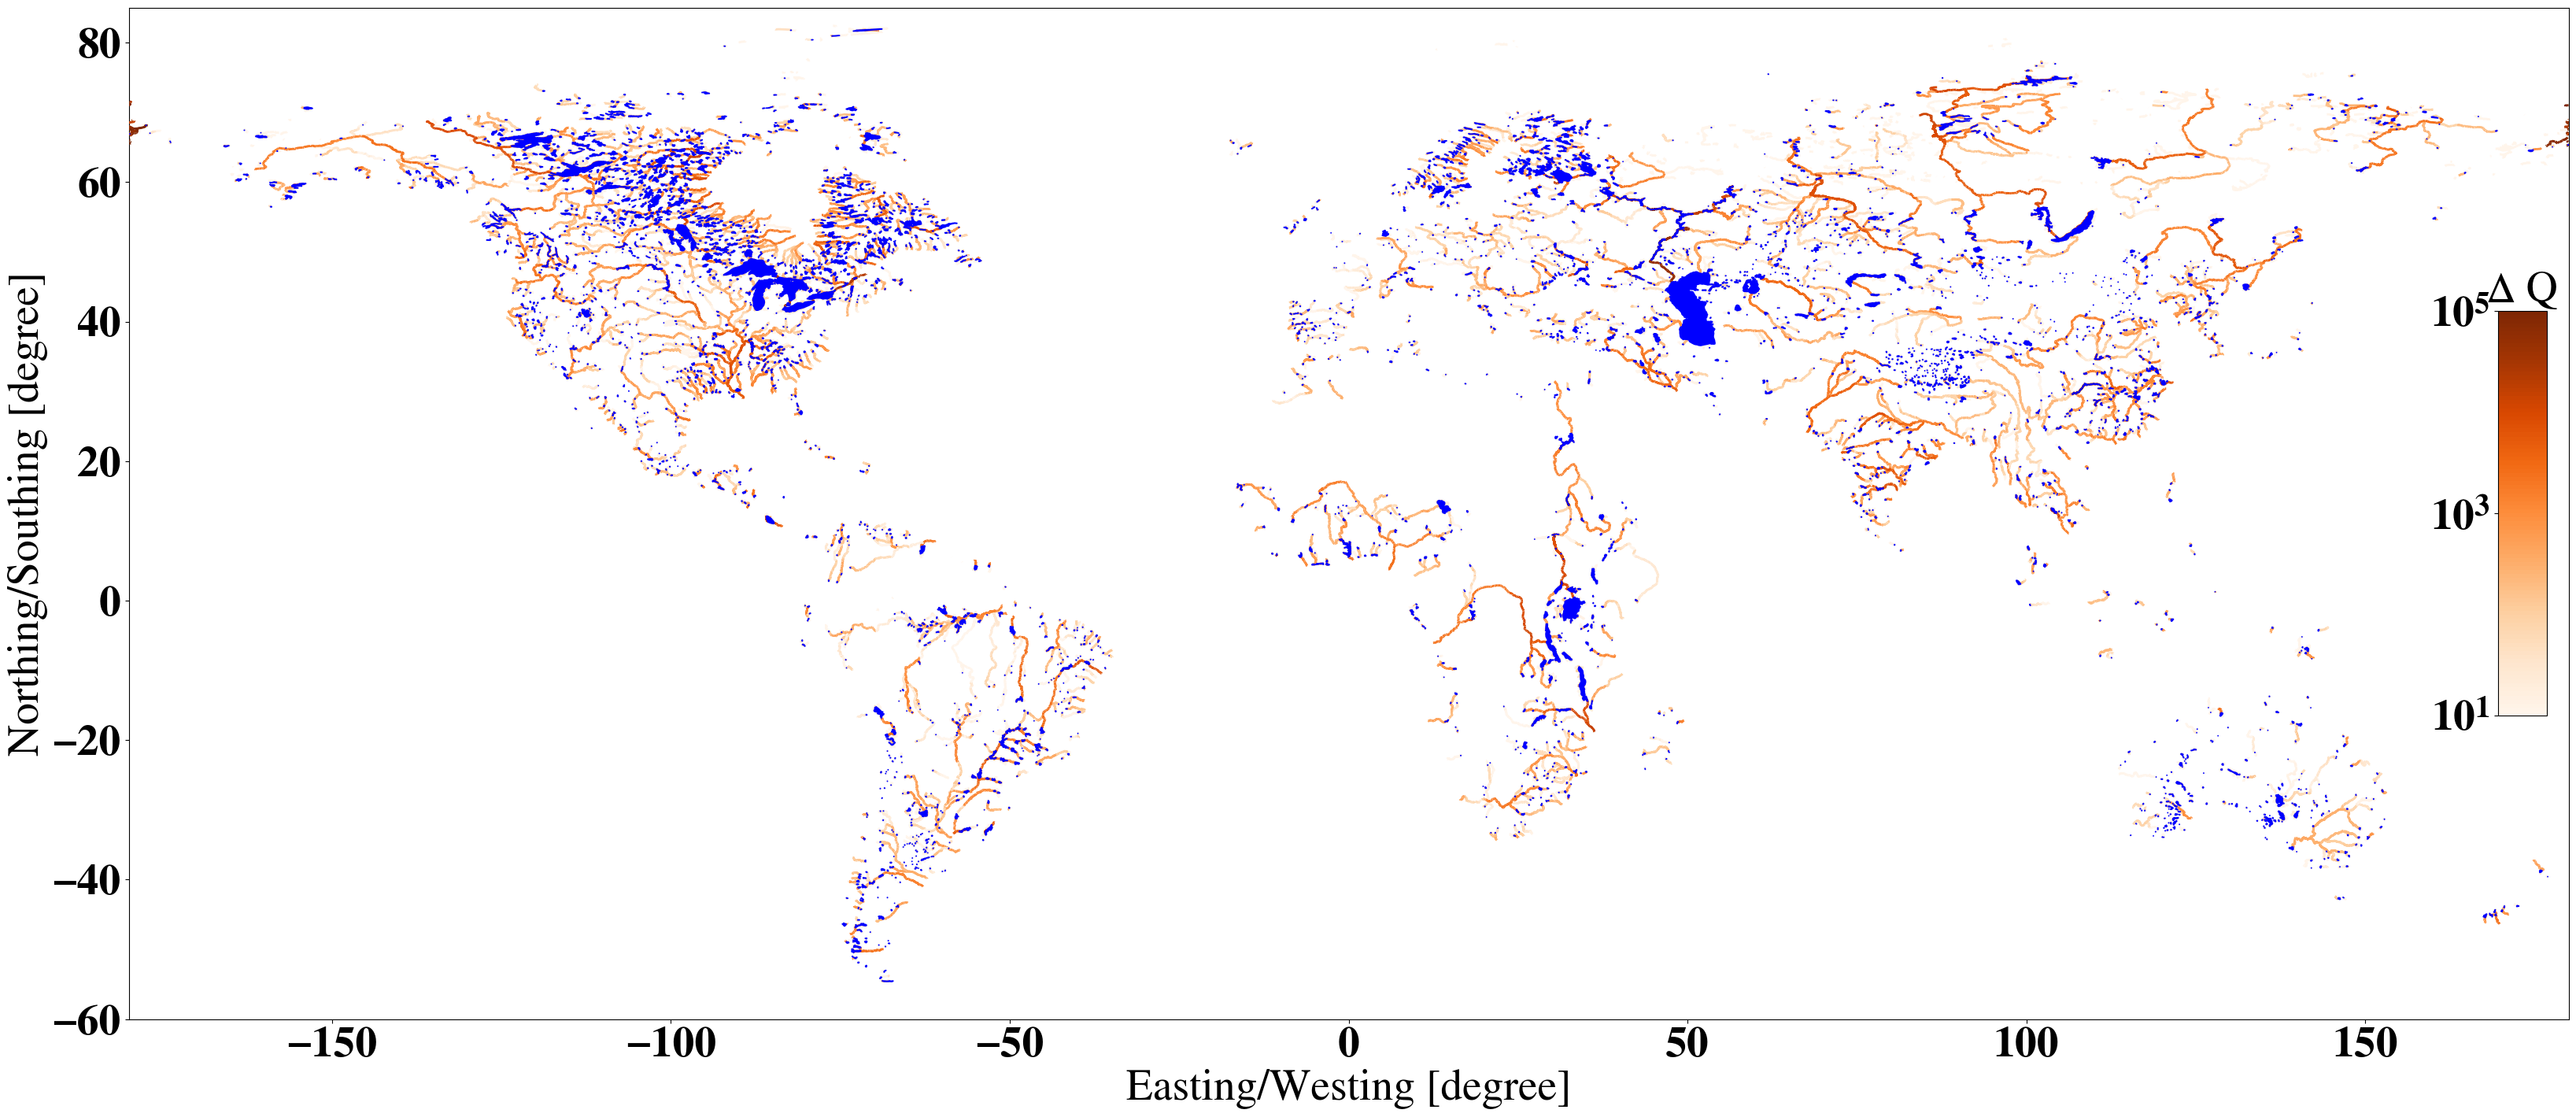

In [8]:
#lakes_buffer = gpd.read_file('/Volumes/F:/hydrography/test/hydrolake_sub100km_final_buffer01.shp')
#lakes = gpd.read_file('/Volumes/F:/hydrography/test/hydrolake_sub100km_final.shp')

lakes_buffer = gpd.read_file('/home/shg096/data/temp/hydrolake_sub100km_final_buffer01.shp')
lakes = gpd.read_file('/home/shg096/data/temp/hydrolake_sub100km_final.shp')
shp = gpd.read_file('/home/shg096/data/temp/river_objective.shp')

NSE_o_with_out_lake_all = np.loadtxt('/home/shg096/data/temp/NSE_o_with_out_lake_all.shp')
NSE_o_with_lake_all = np.loadtxt('/home/shg096/data/temp/NSE_o_with_lake_all.shp')

#plotting
fig, ax = plt.subplots(figsize=(40,30))

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

#shp_slice = shp [shp['obj']>0.01]

#shp_slice = shp [shp['IRFroute_diff']>0.01]
#shp_slice_intact = shp [shp['IRFroute_diff']<=0.01]
shp_slice = shp [shp['IRFroute_d']>0.01]
shp_slice_intact = shp [shp['IRFroute_d']<=0.01]

# shp_slice = shp_slice.to_crs(epsg=3857) # trasnforation for the basemap

A = shp_slice.plot (ax=ax, column='IRFroute_d',
                    cmap='Oranges',
                    vmin=10 , vmax=100000 , linewidth=2,
                    norm=mpl.colors.LogNorm(vmin=10, vmax=100000),
                    zorder=10)#, legend = True)

#shp_slice_intact.plot (ax=ax, color='grey', zorder= 5, linewidth=0.1)


lakes_buffer.plot(ax = ax, zorder=10, color= 'blue', linewidth=3)

# add title and save
#plt.title('Impact of Lakes and Reservoirs on Streamflow Globally', fontsize = 40)
plt.xlabel('Easting/Westing [degree]', fontsize = 40) #xlable which is long
plt.ylabel('Northing/Southing [degree]', fontsize = 40) #ylable which is lat

#
ax.axes.set_xlim([-180,180])
ax.axes.set_ylim([-60,85])

# add colorbar
cmap = plt.get_cmap('Oranges',100)
# norm = mpl.colors.Normalize(vmin=10,vmax=100000)
norm = mpl.colors.LogNorm(vmin=10,vmax=100000)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbaxes = inset_axes(ax, width="2%", height="40%", loc=7) # center left 6, lower center 8, right center 7
cbar = plt.colorbar(sm,\
                    cax=cbaxes)#,\
                    #ticks=[2,5])#,\
#                     orientation="horizontal")

#cbar.ax.set_yticklabels(['10', '100', '1000', '10000', '100000'], fontsize = 30)
#cbar.ax.set_yticklabels(fontsize = 30)
cbar.ax.yaxis.set_ticks_position('left')
#cbar.ax.set_title(u'Δ Q', fontsize = 40)
cbar.ax.set_title(u'Δ Q\n[m³/s]\n ', fontsize=40)

# add basemap
# ctx.add_basemap(ax,
#                 crs=shp_slice.crs,
#                 zoom=3,
#                 alpha = 0.4,
#                 source=ctx.providers.Stamen.TonerLite) # source=ctx.providers.Stamen.TonerLite

ctx.add_basemap(ax,
                crs=shp_slice.crs,
                zoom=3,
                alpha = 1.0,
                source=ctx.providers.CartoDB.Positron) # source=ctx.providers.Stamen.TonerLite



####
####
####
ax2 =fig.add_axes([0.1,0.3,0.2,0.18])


# number of improved stations with lakes:
improved = sum(NSE_o_with_lake_all>NSE_o_with_out_lake_all)
not_improved = sum(NSE_o_with_lake_all<=NSE_o_with_out_lake_all)

print(improved, not_improved)

print(improved/(improved+not_improved))
    
#
# cdf plots:
NSE_o_with_lake_all = np.where(np.isinf(NSE_o_with_lake_all), -100000, NSE_o_with_lake_all)
NSE_o_with_lake_all_sorted = np.sort(NSE_o_with_lake_all)


print(len(NSE_o_with_lake_all_sorted))
print(NSE_o_with_lake_all_sorted)
print(np.cumsum(NSE_o_with_lake_all_sorted))

# Compute the CDF
cdf = np.arange(len(NSE_o_with_lake_all_sorted)) / len(NSE_o_with_lake_all_sorted)

print(cdf)

ax2.plot(NSE_o_with_lake_all_sorted, cdf, label='with lakes', c='r', linewidth=4)

plt.xlim([0,1])
plt.xlabel('$\mathregular{E_{NSE}}$ [-]', fontsize = 40)

plt.ylim([0.48,1.02])
plt.yticks([0.5,0.6,0.7,0.8,0.9,1], [50,60,70,80,90,100])
plt.ylabel('CDF [%]', fontsize = 40)

plt.grid()

NSE_o_with_out_lake_all = np.where(np.isinf(NSE_o_with_out_lake_all), -100000, NSE_o_with_out_lake_all)
NSE_o_with_out_lake_all_sorted = np.sort(NSE_o_with_out_lake_all)

# Compute the CDF
cdf = np.arange(len(NSE_o_with_out_lake_all_sorted)) / len(NSE_o_with_out_lake_all_sorted)

ax2.plot(NSE_o_with_out_lake_all_sorted, cdf, label='without lakes', c='b', linewidth=4)

plt.legend(fontsize = 40)


# tight
plt.tight_layout()
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])


if not os.path.isdir('../figure'):
    os.makedirs('../figure')

plt.savefig('../figure/figure_2.png',dpi = 400)
#plt.savefig('../figure/figure_2.pdf')